for windows system, cairosvg needs to be specified dll path, maybe not for MacOS

In [1]:
import os
# just for windows system
os.environ['path'] += r';C:\Program Files\UniConvertor-2.0rc5\dlls'

In [2]:
import cairosvg

In [6]:
import pandas as pd
import warnings
import sys

this is official viseval pacakge

In [4]:
from viseval.evaluate import Evaluator

this is customized Dataset

In [ ]:
from .dataset import Dataset

In [ ]:
from .chat2agent import Chat2vis

speficy where your databases and visEval_single.json are, a smaller set of test cases in visEval_single.json is highly recommended

In [ ]:
path = ""

In [8]:
dataset = Dataset(path, "single", False)

In [9]:
bench = dataset.benchmark

example of bench content

In [10]:
next(bench)

{'vis_query': {'vis_part': 'Visualize LINE',
  'data_part': {'sql_part': 'SELECT date , COUNT(date), zip_code FROM weather WHERE max_humidity > 80 GROUP BY date,zip_code',
   'binning': ''},
  'VQL': 'SELECT date , COUNT(date), zip_code FROM weather WHERE max_humidity > 80 GROUP BY date,zip_code'},
 'chart': 'Grouping Line',
 'hardness': 'Hard',
 'db_id': 'bike_1',
 'vis_obj': {'chart': 'line',
  'x_name': 'date',
  'y_name': 'COUNT(date)',
  'x_data': [[2013, 2014, 2015]],
  'y_data': [[65, 259, 182],
   [102, 310, 207],
   [76, 285, 216],
   [86, 243, 209],
   [91, 289, 175]],
  'classify': ['94041', '94063', '94107', '94301', '95113'],
  'describe': 'GROUP BY Location_Code, GROUP BY Date_in_Locaton_To',
  'sort': None},
 'nl_queries': ['Give me a group line chart showing the number of days with max humidity higher than 80 in different area each year.'],
 'irrelevant_tables': ['trip', 'status'],
 'query_meta': [{'channel_specified': ['x', 'y', 'classify']}],
 'id': '778',
 'tables': 

In [11]:
config = {"library": "matplotlib"}

please add your openai key in chat2test.py before importing Chat2vis class

Chat2vis class is a customized inherited class

In [15]:
agent = Chat2vis()

In [18]:
evaluator = Evaluator(webdriver_path=None, vision_model=None)

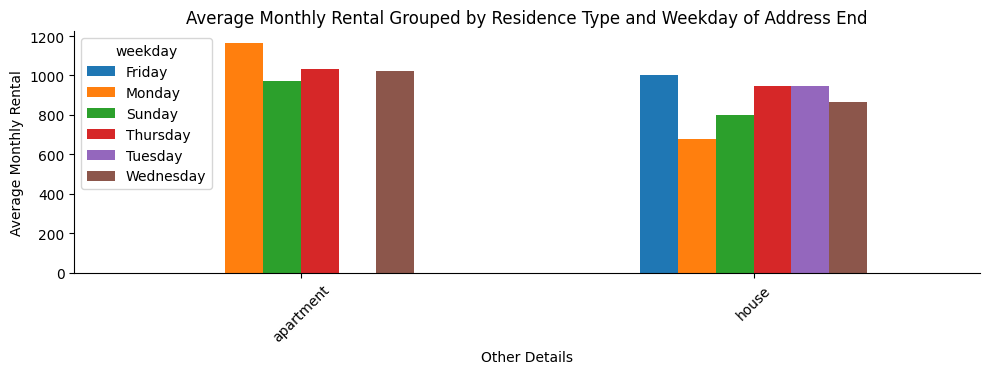

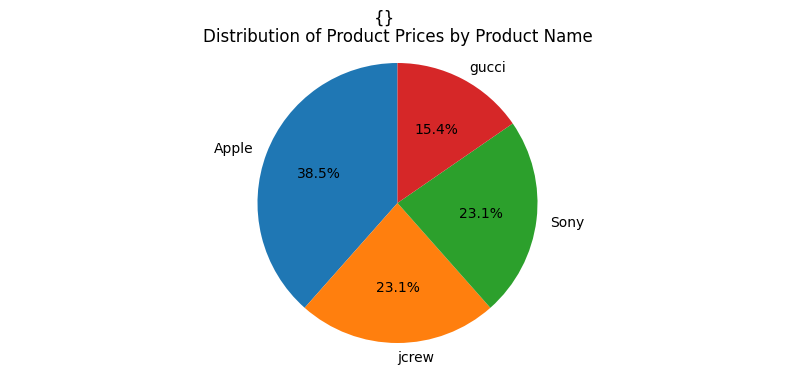

["NameError: name 'ax' is not defined\n"]


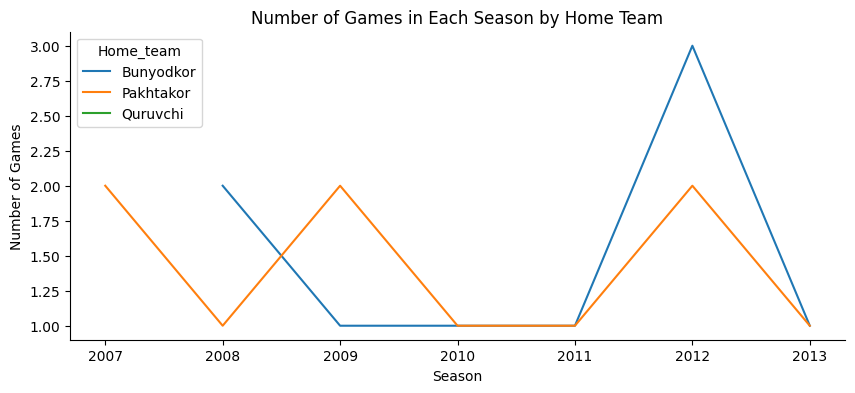

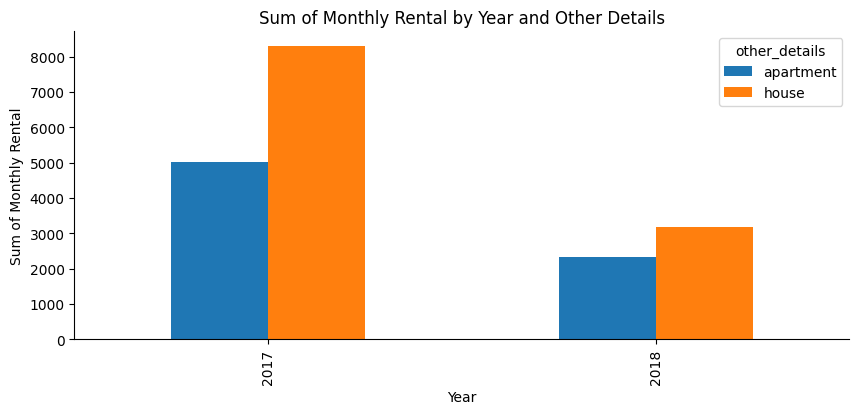

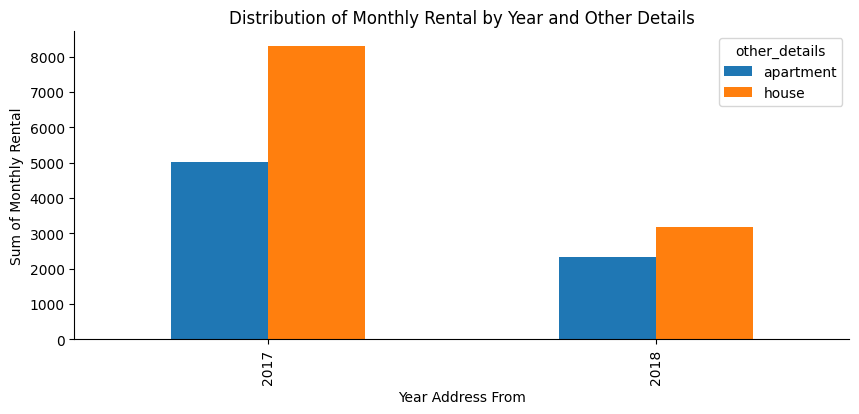

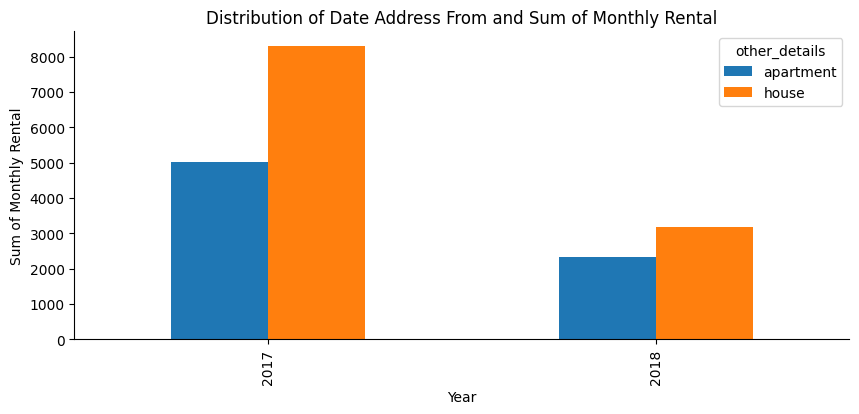

["NameError: name 'pd' is not defined\n"]


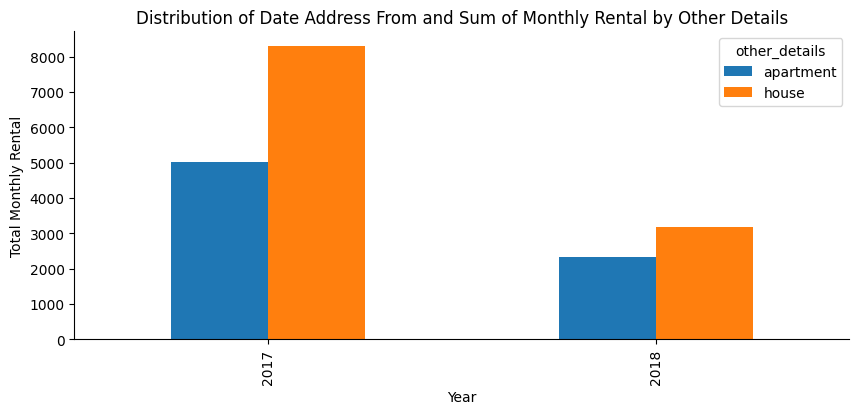

["NameError: name 'pd' is not defined\n"]
["NameError: name 'ax' is not defined\n"]


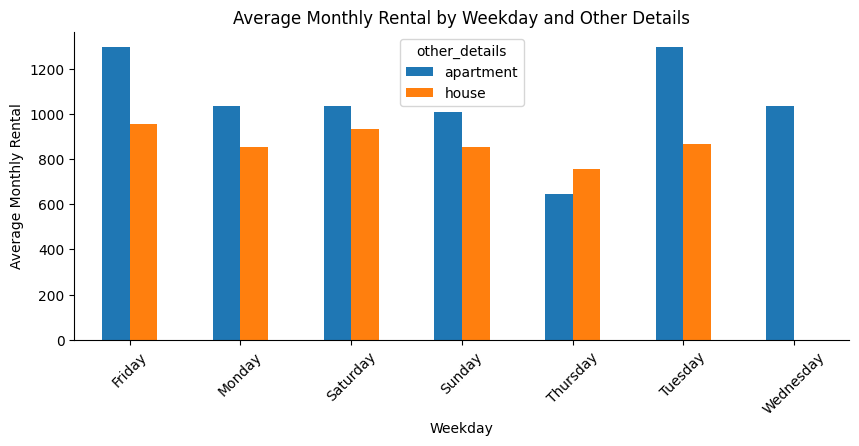

In [19]:
result = evaluator.evaluate(agent, dataset, config)

In [20]:
df = result.detail_records()

need validation on result

In [20]:
df

,id,chart,hardness,code execution_fail_rate,surface-form check_fail_rate,deconstruction_fail_rate,chart type check_fail_rate,data check_fail_rate,order check_fail_rate,layout check_fail_rate,scale and ticks check_fail_rate,invalid_rate,illegal rate,pass_rate,quality_score
0,211,Stacked Bar,Extra Hard,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,211,Stacked Bar,Extra Hard,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,211,Stacked Bar,Extra Hard,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1008,Pie,Hard,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1008,Pie,Hard,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1008,Pie,Hard,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,194,Stacked Bar,Extra Hard,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,194,Stacked Bar,Extra Hard,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,194,Stacked Bar,Extra Hard,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1482,Grouping Line,Hard,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
df.to_csv('visEvaTest.csv', index=False)

print score is currently unusable, check out the result dataframe for all information

In [ ]:
score = result.score()
print(f"Score: {score}")